El menor valor de la matriz es:  0.3513
El valor menor a 1 es:  4
La posición del valor menor a 1 es:  2  Camiones y  4  Rampas


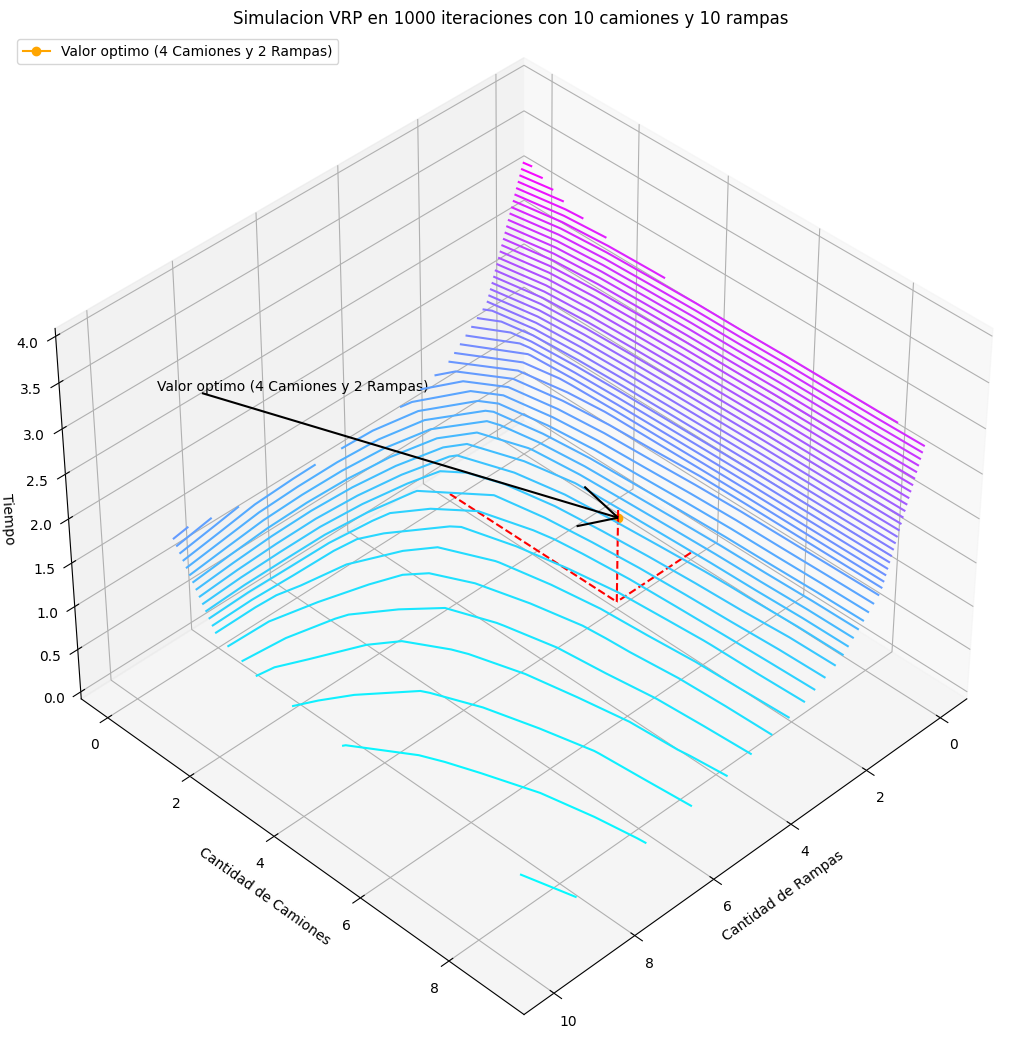

In [121]:
# Leer los datos de DatosRecogidos.csv y mostrarlos en una gráfica
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Leer los datos de DatosRecogidos.npy
datos = np.load('DatosRecogidos.npy')
datos = datos[:,:,4].T# Redondear los valores a 5 decimales
datos = np.around(datos, decimals=4)
# Imprimir el menor valor de la matriz
print('El menor valor de la matriz es: ', np.amin(datos))
# En los datos encontrar el valor que sea menor a 1, pero que minimice la suma de de los ejes X y Y
# Encontrar el valor que sea menor a 1
# Utilizar la matriz de datos
minimo = 100
for i in range(10):
    for j in range(10):
        if i+j < minimo and datos[i][j] < 1:
            minimo = i + j
            xopt = i
            yopt = j
# Mostrar el valor que sea menor a 1
print('El valor menor a 1 es: ', minimo)
# Mostrar la posición del valor menor a 1
print('La posición del valor menor a 1 es: ', xopt + 1, ' Camiones y ', yopt + 1, ' Rampas')
# Graficamos en 3D los datos recogidos
# Definimos los ejes
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
x, y = np.meshgrid(x, y)
# Definimos el tamaño de la figura
plt.rcParams['figure.figsize'] = [13, 13]
# Graficamos los datos
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, datos, 50, cmap='cool')
ax.set_ylabel('Cantidad de Camiones')
ax.set_xlabel('Cantidad de Rampas')
ax.set_zlabel('Tiempo')
ax.set_title('Simulacion VRP en 1000 iteraciones con 10 camiones y 10 rampas')
# Girar la gráfica
# Agregar un circulo en el punto (xopt+1, yopt+1)
ax.plot([xopt + 1], [yopt + 1], [datos[xopt][yopt]], c='orange', marker='o')
# Agregar lineas que conecten el punto con los ejes que vayan desde abajo hasta el punto
ax.plot([xopt + 1, xopt + 1], [yopt + 1, yopt + 1], [0, datos[xopt][yopt]], c='r', linestyle='--')
ax.plot([xopt + 1, xopt + 1], [yopt + 1, yopt + 1], [datos[xopt][yopt], datos[xopt][yopt]+.1], c='r', linestyle='dashed')
# Agregar lineas que conecen los ejes a la linea punteada
ax.plot([xopt + 1, xopt + 1], [0, yopt + 1], [0, 0], c='r', linestyle='--')
ax.plot([0, xopt + 1], [yopt + 1, yopt + 1], [0, 0], c='r', linestyle='--')
# Agregar una flecha que apunte al punto desde el punto (0,8) al punto (xopt+1, yopt+1)
ax.quiver(10, 2, 4, (xopt + 1) - 10, (yopt + 1) - 2,datos[xopt][yopt] - 4, color='black', arrow_length_ratio=0.1)

# Agregar el texto al inicio de la flecha
ax.text(11, 2, 4.3, 'Valor optimo ({0} Camiones y {1} Rampas)'.format(yopt + 1, xopt + 1), color='black')
# Agregar leyenda de que es el punto naranja
ax.legend([f'Valor optimo ({yopt + 1} Camiones y {xopt + 1} Rampas)'], loc='upper left')

# Girar la gráfica
ax.view_init(40, 45)
plt.show()